# IBM Q Exercise 2: Measuring two (non-entangled) qubits
### Written by Anna Liv Paludan Bjerregaard

In this exercise we expand our knowledge of quantum circuits from one qubit to two qubits!

We'll start right away by making a circuit!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble

from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/tmp/ipykernel_96/4023411004.py:12: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


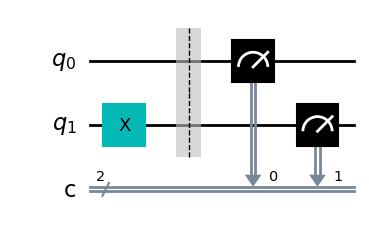

In [2]:
circuit = QuantumCircuit(2,2)
circuit.x(1)
circuit.barrier()
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw()

Notice that we now have two lines marked "$q$" since we have two qubits. They have the subscripts "0" and "1" since Python (and most other programming languages) count from 0. So $q_o$ is the first qubit, and $q_1$ is the second. We use the operator $X$ on the second qubit. Notice as well that we make two measurements - first we measure the first qubit and then the second. Don't mind the grey barrier, it is only there for aesthetic purposes.


**Exercise:** What state is each qubit in? What is the total state of the system?
In the code below a measurement is performed on the system, what are the possible outcomes?

In [3]:
sim = True
N_measure = 100

{'00': 0, '10': 100, '01': 0, '11': 0}


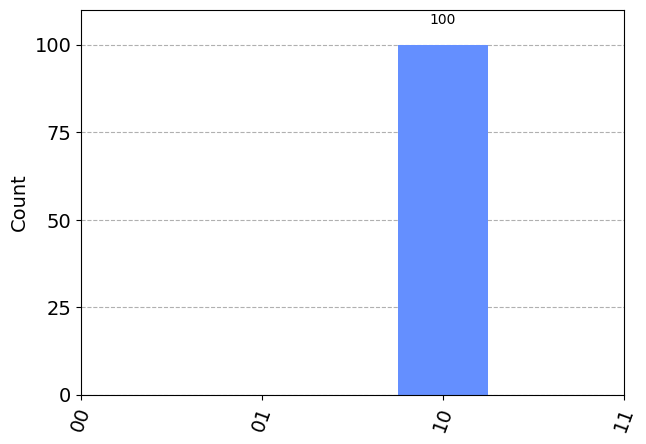

In [4]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuit, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = N_measure
    transpiled_circ = transpile(circuit, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['00','10','01','11']
measurement_names = ['00','10','01','11']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

Explain the histogram. Does it agree with your expectations?

Now let's try replacing the operator $X$ with $H$.

In [ ]:
circuitH = QuantumCircuit(2,2)
circuitH.h(1)
circuitH.barrier()
circuitH.measure(0,0)
circuitH.measure(1,1)
circuitH.draw()

**Exercise:** What state are the qubits in before the measurement? What are the possible outcomes of the measurement? With what propability do these outcomes occur?

In [ ]:
sim = True
N_measure = 1024

In [ ]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuitH, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuitH, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['00','10','01','11']
measurement_names = ['00','10','01','11']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

**Check:** Does the histogram match your expectations?

**Bonus excercises:** The next two circuits are bonus exercises, but feel free to look at them to get more experience with two-qubit systems.

In [ ]:
circuitE1 = QuantumCircuit(2,2)
circuitE1.x(0)
circuitE1.h(1)
circuitE1.barrier()
circuitE1.measure(0,0)
circuitE1.measure(1,1)
circuitE1.draw()

**Exercise:** Confirm that the circuit puts the qubits in the state
$$\frac{1}{\sqrt{2}}\left(|11\rangle + |01\rangle\right)$$
What are the possible outcomes of measuring this state? With what propabilities do they occur?

In [ ]:
sim = True
N_measure = 1024

In [ ]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuitE1, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuitE1, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['00','01','10','11']
measurement_names = ['00','01','10','11']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

In [ ]:
circuitE2 = QuantumCircuit(2,2)
circuitE2.x(0)
circuitE2.h(1)
circuitE2.z(0)
circuitE2.z(1)
circuitE2.barrier()
circuitE2.measure(0,0)
circuitE2.measure(1,1)
circuitE2.draw()

**Exercise:** Confirm that the circuit puts the qubits in the state
$$\frac{1}{\sqrt{2}}\left(|11\rangle - |01\rangle\right)$$
Do you expect the measurement of this circuit will be different that the circuit above?

In [ ]:
sim = True
N_measure = 1024

In [ ]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuitE2, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuitE2, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['00','10','01','11']
measurement_names = ['00','10','01','11']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

Now we've looked at some exercises with two qubits. Were any of them entangled? To put it another way, did measuring one qubit ever influence the other? What would happen if we exchanged the order of measurements in the circuits above?

Having thought about these questions, you're ready to take on the next exercise which deals with entanglement!